In [1]:
from helper import *

In [2]:
SUBSET = '200k'
DATA_DIR = 'data/'

In [3]:
DATA_FILENAME = '2x2lbp_subset'
(Xl_train, y_train), (Xl_test, y_test) = \
    load_npz(DATA_DIR + DATA_FILENAME + SUBSET + '.npz')

((200000, 40), dtype('int16')) ((200000,), dtype('uint8'))
((20000, 40), dtype('int16')) ((20000,), dtype('uint8'))


In [4]:
DATA_FILENAME = '2gabor_subset'
(Xg_train, y_train_), (Xg_test, y_test_) = \
    load_npz(DATA_DIR + DATA_FILENAME + SUBSET + '.npz')
assert np.all(y_train == y_train_)
assert np.all(y_test == y_test_)

((200000, 4), dtype('float32')) ((200000,), dtype('uint8'))
((20000, 4), dtype('float32')) ((20000,), dtype('uint8'))


In [5]:
DATA_FILENAME = '2d_gaboscharr_subset'
(Xs_train, y_train_), (Xs_test, y_test_) = \
    load_npz(DATA_DIR + DATA_FILENAME + SUBSET + '.npz')
assert np.all(y_train == y_train_)
assert np.all(y_test == y_test_)

((200000, 16), dtype('float32')) ((200000,), dtype('uint8'))
((20000, 16), dtype('float32')) ((20000,), dtype('uint8'))


In [6]:
Xf_train = np.hstack((Xl_train, Xg_train, Xs_train))
Xf_test = np.hstack((Xl_test, Xg_test, Xs_test))
Xf_train.shape, Xf_test.shape

((200000, 60), (20000, 60))

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.losses import BinaryCrossentropy
from keras.layers import *
from tensorflow.keras.optimizers import SGD, Adam
import os

In [8]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_VISIBLE_DEVICES"] = '1'
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [9]:
model = Sequential()

model.add(Dense(60, activation='relu', input_shape=(Xf_train.shape[1:])))
model.add(Dropout(0.005))
model.add(Dense(60, activation='relu'))
model.add(Dropout(0.005))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                3660      
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 60)                3660      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 61        
Total params: 7,381
Trainable params: 7,381
Non-trainable params: 0
_________________________________________________________________


In [10]:
Xf_mean = Xf_train.mean(axis=0)
Xf_std = Xf_train.std(axis=0)
Xf_train = (Xf_train - Xf_mean) / Xf_std
Xf_test = (Xf_test - Xf_mean) / Xf_std

In [11]:
model.compile(loss=BinaryCrossentropy(from_logits=False),
              optimizer=Adam(learning_rate=1e-3),
              metrics=['accuracy'])

history1 = model.fit(Xf_train, y_train,
                    batch_size=64,
                    epochs=25,
                    verbose=2, 
                    validation_data=(Xf_test, y_test)
                   )

Epoch 1/25
3125/3125 - 3s - loss: 0.3418 - accuracy: 0.8507 - val_loss: 0.2987 - val_accuracy: 0.8717
Epoch 2/25
3125/3125 - 2s - loss: 0.2897 - accuracy: 0.8773 - val_loss: 0.2793 - val_accuracy: 0.8836
Epoch 3/25
3125/3125 - 2s - loss: 0.2740 - accuracy: 0.8854 - val_loss: 0.2685 - val_accuracy: 0.8872
Epoch 4/25
3125/3125 - 2s - loss: 0.2622 - accuracy: 0.8910 - val_loss: 0.2565 - val_accuracy: 0.8945
Epoch 5/25
3125/3125 - 2s - loss: 0.2543 - accuracy: 0.8953 - val_loss: 0.2528 - val_accuracy: 0.8945
Epoch 6/25
3125/3125 - 2s - loss: 0.2475 - accuracy: 0.8984 - val_loss: 0.2434 - val_accuracy: 0.9003
Epoch 7/25
3125/3125 - 2s - loss: 0.2424 - accuracy: 0.9007 - val_loss: 0.2463 - val_accuracy: 0.8976
Epoch 8/25
3125/3125 - 2s - loss: 0.2371 - accuracy: 0.9035 - val_loss: 0.2386 - val_accuracy: 0.9046
Epoch 9/25
3125/3125 - 2s - loss: 0.2343 - accuracy: 0.9046 - val_loss: 0.2373 - val_accuracy: 0.9042
Epoch 10/25
3125/3125 - 2s - loss: 0.2296 - accuracy: 0.9070 - val_loss: 0.2262 - 

In [12]:
model.compile(loss=BinaryCrossentropy(from_logits=False),
              optimizer=Adam(learning_rate=2e-4),
              metrics=['accuracy'])

history2 = model.fit(Xf_train, y_train,
                    batch_size=128,
                    epochs=25,
                    verbose=2, 
                    validation_data=(Xf_test, y_test)
                   )

Epoch 1/25
1563/1563 - 2s - loss: 0.1836 - accuracy: 0.9280 - val_loss: 0.1944 - val_accuracy: 0.9244
Epoch 2/25
1563/1563 - 1s - loss: 0.1819 - accuracy: 0.9286 - val_loss: 0.1949 - val_accuracy: 0.9245
Epoch 3/25
1563/1563 - 1s - loss: 0.1808 - accuracy: 0.9288 - val_loss: 0.1944 - val_accuracy: 0.9253
Epoch 4/25
1563/1563 - 1s - loss: 0.1804 - accuracy: 0.9292 - val_loss: 0.1936 - val_accuracy: 0.9254
Epoch 5/25
1563/1563 - 1s - loss: 0.1800 - accuracy: 0.9297 - val_loss: 0.1940 - val_accuracy: 0.9257
Epoch 6/25
1563/1563 - 1s - loss: 0.1791 - accuracy: 0.9298 - val_loss: 0.1927 - val_accuracy: 0.9247
Epoch 7/25
1563/1563 - 1s - loss: 0.1790 - accuracy: 0.9299 - val_loss: 0.1931 - val_accuracy: 0.9251
Epoch 8/25
1563/1563 - 1s - loss: 0.1787 - accuracy: 0.9300 - val_loss: 0.1930 - val_accuracy: 0.9264
Epoch 9/25
1563/1563 - 1s - loss: 0.1781 - accuracy: 0.9299 - val_loss: 0.1934 - val_accuracy: 0.9254
Epoch 10/25
1563/1563 - 2s - loss: 0.1776 - accuracy: 0.9305 - val_loss: 0.1936 - 

In [13]:
model.compile(loss=BinaryCrossentropy(from_logits=False),
              optimizer=SGD(learning_rate=0.005),
              metrics=['accuracy'])

history3 = model.fit(Xf_train, y_train,
                    batch_size=256,
                    epochs=25,
                    verbose=2, 
                    validation_data=(Xf_test, y_test)
                   )

Epoch 1/25
782/782 - 1s - loss: 0.1711 - accuracy: 0.9327 - val_loss: 0.1899 - val_accuracy: 0.9280
Epoch 2/25
782/782 - 1s - loss: 0.1708 - accuracy: 0.9332 - val_loss: 0.1898 - val_accuracy: 0.9281
Epoch 3/25
782/782 - 1s - loss: 0.1704 - accuracy: 0.9329 - val_loss: 0.1897 - val_accuracy: 0.9279
Epoch 4/25
782/782 - 1s - loss: 0.1708 - accuracy: 0.9330 - val_loss: 0.1899 - val_accuracy: 0.9277
Epoch 5/25
782/782 - 1s - loss: 0.1705 - accuracy: 0.9329 - val_loss: 0.1899 - val_accuracy: 0.9280
Epoch 6/25
782/782 - 1s - loss: 0.1701 - accuracy: 0.9333 - val_loss: 0.1898 - val_accuracy: 0.9286
Epoch 7/25
782/782 - 1s - loss: 0.1704 - accuracy: 0.9332 - val_loss: 0.1896 - val_accuracy: 0.9277
Epoch 8/25
782/782 - 1s - loss: 0.1706 - accuracy: 0.9331 - val_loss: 0.1897 - val_accuracy: 0.9272
Epoch 9/25
782/782 - 1s - loss: 0.1701 - accuracy: 0.9335 - val_loss: 0.1897 - val_accuracy: 0.9283
Epoch 10/25
782/782 - 1s - loss: 0.1705 - accuracy: 0.9333 - val_loss: 0.1898 - val_accuracy: 0.9273

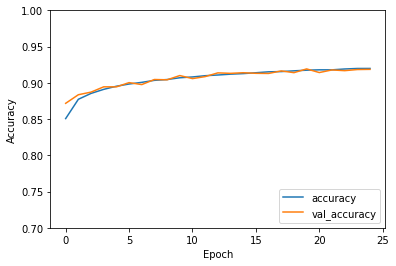

In [14]:
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1.0])
plt.legend(loc='lower right');